# Indonesia

## Basic Data (Import and Visualization)

### Start (Importing Libraries)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline

### Read data and Plotting

In [2]:
df = pd.read_csv('/Users/abdul/Documents/Academics/Metnum/UTS/dataset/csv/indonesia.csv')
type(df)

pandas.core.frame.DataFrame

In [3]:
df.shape

(25, 5)

In [4]:
df.columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
df

,Confirmed,New,Deaths,Active
Date,,,,
2020-03-02,2,0,0,2
2020-03-03,2,0,0,2
2020-03-04,2,0,0,2
2020-03-05,2,0,0,2
2020-03-06,4,2,0,4
2020-03-07,4,0,0,4
2020-03-08,6,2,0,6
2020-03-09,19,13,0,19
2020-03-10,27,8,0,25


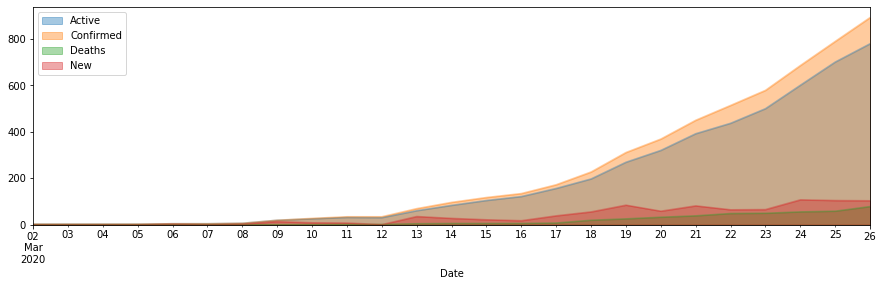

In [6]:
df.plot.area(y=["Active", "Confirmed", "Deaths", "New"], figsize=(15,4), alpha=0.4, subplots=False, stacked=False)

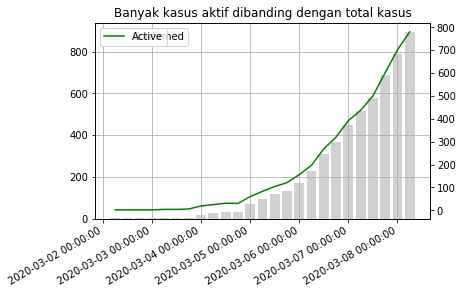

In [7]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(df.index, df["Confirmed"], color=(190/255,190/255,190/255,0.7), label='Confirmed')
ax2.plot(df.index, df["Active"], color='green', label='Active')
ax.set_xticklabels(df.index)
ax.legend(loc='best')
ax2.legend(loc='best')
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set_title('Banyak kasus aktif dibanding dengan total kasus')
fig.autofmt_xdate()

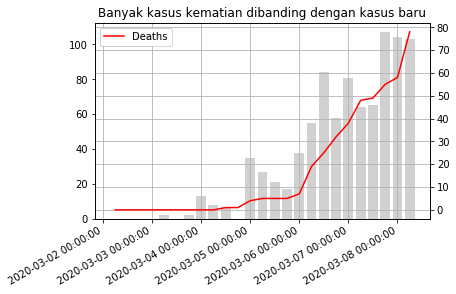

In [8]:
fig, ax3 = plt.subplots()
ax4 = ax3.twinx()
ax3.bar(df.index, df["New"], color=(190/255,190/255,190/255,0.7), label='New')
ax4.plot(df.index, df["Deaths"], color='red', label='Deaths')
ax3.set_xticklabels(df.index)
ax3.legend(loc='best')
ax4.legend(loc='best')
ax3.xaxis.grid(True)
ax4.yaxis.grid(True)
ax3.set_title('Banyak kasus kematian dibanding dengan kasus baru')
fig.autofmt_xdate()

## Regressions

### Active 

- Start: 2-Mar-2020
- End: 26-Mar-2020
- Range: 25 Days

**Data**

In [9]:
y = np.array ((2, 2, 2, 2, 4, 4, 6, 19, 25, 31, 30, 60, 83, 104, 121, 156, 197, 269, 320, 392, 437, 500, 601, 701, 780))
y = y.astype('float64')
y

array([  2.,   2.,   2.,   2.,   4.,   4.,   6.,  19.,  25.,  31.,  30.,
        60.,  83., 104., 121., 156., 197., 269., 320., 392., 437., 500.,
       601., 701., 780.])

In [10]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

**Plot**

Text(0, 0.5, 'y-jumlah orang')

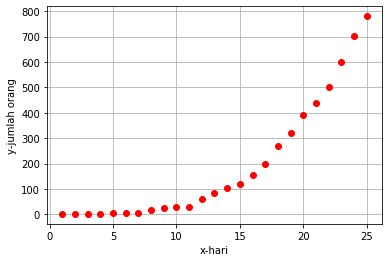

In [11]:
ax = plt.plot(x,y,'ro')
plt.grid()
plt.xlabel('x-hari')
plt.ylabel('y-jumlah orang')

#### Regresi Berpangkat

**Data**

In [12]:
y = np.array ((2, 2, 2, 2, 4, 4, 6, 19, 25, 31, 30, 60, 83, 104, 121, 156, 197, 269, 320, 392, 437, 500, 601, 701, 780))
y = y.astype('float64')
y

array([  2.,   2.,   2.,   2.,   4.,   4.,   6.,  19.,  25.,  31.,  30.,
        60.,  83., 104., 121., 156., 197., 269., 320., 392., 437., 500.,
       601., 701., 780.])

In [13]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

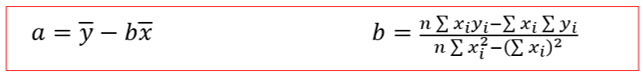

**Membuat xreg untuk plotting selanjutnya**

In [14]:
#membuat xreg
xreg = np.array(range(10,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

**Regresi berpangkat**

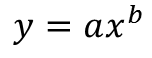

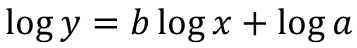

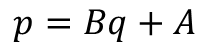

In [15]:
p = np.log10(y)
q = np.log10(x)

**Hitung regresi linear**

In [16]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil regresi linear**

In [17]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 2.3598q -0.6778


**Kembalikan ke bentuk pangkat**

In [18]:
a = 10**A #A=log(a)
b = B
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 0.2100x^(2.3598)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [19]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9341 dan r^2 = 0.8725


**Plot**

In [20]:
#membuat yreg
yreg = a*(xreg**b)
yreg
    

array([2.09998102e-01, 2.62962767e-01, 3.22900043e-01, 3.90031860e-01,
       4.64568583e-01, 5.46710437e-01, 6.36648676e-01, 7.34566546e-01,
       8.40640091e-01, 9.55038840e-01, 1.07792639e+00, 1.20946090e+00,
       1.34979556e+00, 1.49907894e+00, 1.65745534e+00, 1.82506512e+00,
       2.00204492e+00, 2.18852793e+00, 2.38464410e+00, 2.59052032e+00,
       2.80628063e+00, 3.03204635e+00, 3.26793624e+00, 3.51406662e+00,
       3.77055152e+00, 4.03750277e+00, 4.31503012e+00, 4.60324133e+00,
       4.90224224e+00, 5.21213690e+00, 5.53302761e+00, 5.86501500e+00,
       6.20819810e+00, 6.56267443e+00, 6.92854000e+00, 7.30588942e+00,
       7.69481594e+00, 8.09541147e+00, 8.50776666e+00, 8.93197094e+00,
       9.36811255e+00, 9.81627859e+00, 1.02765550e+01, 1.07490268e+01,
       1.12337778e+01, 1.17308908e+01, 1.22404478e+01, 1.27625296e+01,
       1.32972164e+01, 1.38445873e+01, 1.44047204e+01, 1.49776933e+01,
       1.55635824e+01, 1.61624637e+01, 1.67744121e+01, 1.73995019e+01,
      

Text(0, 0.5, 'y-banyak orang')

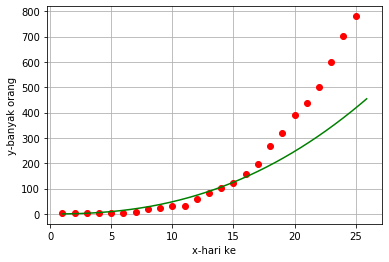

In [21]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'g')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

#### Regresi Eksponensial

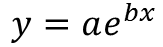

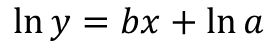

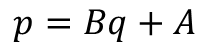

**Linearisasi**

In [22]:
y = np.array ((2, 2, 2, 2, 4, 4, 6, 19, 25, 31, 30, 60, 83, 104, 121, 156, 197, 269, 320, 392, 437, 500, 601, 701, 780))
y = y.astype('float64')
y

array([  2.,   2.,   2.,   2.,   4.,   4.,   6.,  19.,  25.,  31.,  30.,
        60.,  83., 104., 121., 156., 197., 269., 320., 392., 437., 500.,
       601., 701., 780.])

In [23]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

In [24]:
p = np.log(y)
q = x

**Hitung regresi linear**

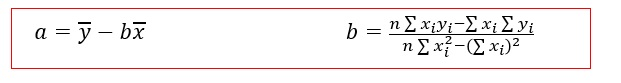

In [25]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil persamaan linear**

In [26]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 0.2815q + 0.2545


**Hitung kembali dalam bentuk bilangan berpangkat**

In [27]:
a = np.e**A
b = B

In [28]:
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 1.2898x^(0.2815)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [29]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9831 dan r^2 = 0.9665


**Plot data dan regresinya**

In [30]:
#membuat xreg
xreg = np.array(range(0,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [31]:
#membuat yreg
yreg = a*np.e**(b*xreg)
yreg

array([1.28983281e+00, 1.32666188e+00, 1.36454254e+00, 1.40350482e+00,
       1.44357961e+00, 1.48479867e+00, 1.52719467e+00, 1.57080122e+00,
       1.61565288e+00, 1.66178521e+00, 1.70923478e+00, 1.75803919e+00,
       1.80823712e+00, 1.85986838e+00, 1.91297389e+00, 1.96759573e+00,
       2.02377721e+00, 2.08156287e+00, 2.14099850e+00, 2.20213121e+00,
       2.26500947e+00, 2.32968312e+00, 2.39620341e+00, 2.46462309e+00,
       2.53499638e+00, 2.60737906e+00, 2.68182851e+00, 2.75840374e+00,
       2.83716546e+00, 2.91817608e+00, 3.00149984e+00, 3.08720276e+00,
       3.17535280e+00, 3.26601981e+00, 3.35927567e+00, 3.45519430e+00,
       3.55385173e+00, 3.65532616e+00, 3.75969803e+00, 3.86705007e+00,
       3.97746737e+00, 4.09103746e+00, 4.20785035e+00, 4.32799865e+00,
       4.45157758e+00, 4.57868511e+00, 4.70942198e+00, 4.84389184e+00,
       4.98220126e+00, 5.12445988e+00, 5.27078046e+00, 5.42127899e+00,
       5.57607476e+00, 5.73529047e+00, 5.89905232e+00, 6.06749012e+00,
      

Text(0, 0.5, 'y-banyak orang')

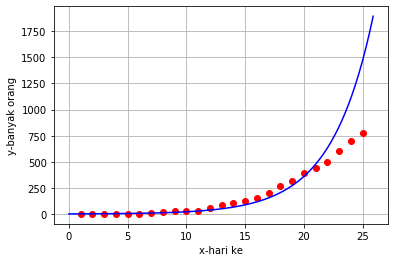

In [32]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

**Selesai**

#### Regresi Polinomial

In [33]:
y = np.array ((2, 2, 2, 2, 4, 4, 6, 19, 25, 31, 30, 60, 83, 104, 121, 156, 197, 269, 320, 392, 437, 500, 601, 701, 780))
y = y.astype('float64')
y

array([  2.,   2.,   2.,   2.,   4.,   4.,   6.,  19.,  25.,  31.,  30.,
        60.,  83., 104., 121., 156., 197., 269., 320., 392., 437., 500.,
       601., 701., 780.])

In [34]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

**Membentuk regresi polinomial dari matriks**

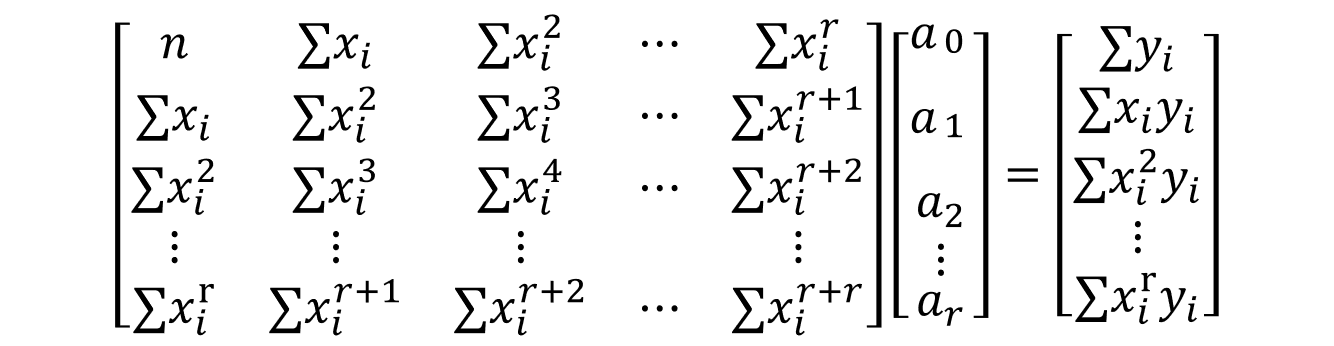

**Mendefinisikan elemen-elemen matriks kiri**

In [35]:
n = len(y)
a = x.sum()
b = (x**2).sum()
c = (x**3).sum()
d = (x**4).sum()
e = (x**5).sum()
f = (x**6).sum()
A = np.array(([n, a, b, c],
    [a, b, c, d],
    [b, c, d, e],
    [c, d, e, f]))
A

array([[2.50000000e+01, 3.25000000e+02, 5.52500000e+03, 1.05625000e+05],
       [3.25000000e+02, 5.52500000e+03, 1.05625000e+05, 2.15364500e+06],
       [5.52500000e+03, 1.05625000e+05, 2.15364500e+06, 4.57356250e+07],
       [1.05625000e+05, 2.15364500e+06, 4.57356250e+07, 9.98881325e+08]])

**Mendefinisikan elemen-elemen matriks kanan**

In [36]:
g = y.sum()
h = (x*y).sum()
i = ((x**2)*y).sum()
j = ((x**3)*y).sum()
B = np.array(([g],
    [h],
    [i],
    [j]))
B

array([[4.848000e+03],
       [1.011240e+05],
       [2.181112e+06],
       [4.815036e+07]])

**Invers matriks sisi kiri**

In [37]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 8.77549407e-01, -2.57246377e-01,  2.01581028e-02,
        -4.61133070e-04],
       [-2.57246377e-01,  9.35938726e-02, -8.05152979e-03,
         1.94062513e-04],
       [ 2.01581028e-02, -8.05152979e-03,  7.32238776e-04,
        -1.82989313e-05],
       [-4.61133070e-04,  1.94062513e-04, -1.82989313e-05,
         4.69203368e-07]])

**Mencari nilai a0, a1, a2, dst dengan a = (A^-1)B namun di sini variabel a diganti dengan Y**

In [38]:
Y = Ainv.dot(B)
print(Y)

[[ 3.93343874]
 [ 0.34794996]
 [-0.48176751]
 [ 0.06909676]]


In [39]:
a0 = Y[0,0]
a1 = Y[1,0]
a2 = Y[2,0]
a3 = Y[3,0]

**Hasil persamaan regresi polinomial**

In [40]:
print('y = {:.4f}x^3 + {:.4f}X^2 + {:.4f}x + {:.4f}'.format(a3, a2, a1, a0))

y = 0.0691x^3 + -0.4818X^2 + 0.3479x + 3.9334


In [41]:
y

array([  2.,   2.,   2.,   2.,   4.,   4.,   6.,  19.,  25.,  31.,  30.,
        60.,  83., 104., 121., 156., 197., 269., 320., 392., 437., 500.,
       601., 701., 780.])

**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [42]:
yDt = (y-y.mean())**2
yD = (y-a0-a1*x-a2*(x**2)-a3*(x**3))**2
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9993 dan r^2 = 0.9665


**Plot**

Text(0, 0.5, 'y')

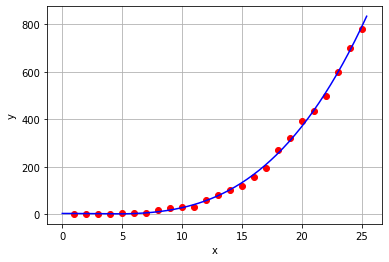

In [43]:
xreg = np.array(range(0,int((x[-1]+0.5)*10)))
xreg = xreg/10
yreg = a0 + a1*xreg + a2*(xreg**2) + a3*(xreg**3)
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Perbandingan jika memakai polyfit dengan derajat dinaikkan**

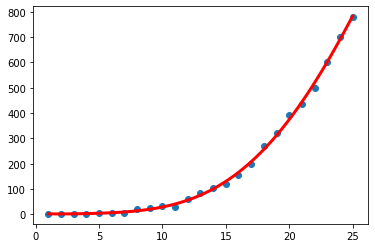

In [44]:
regpoly = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, len(y), 100)

plt.scatter(x, y)
plt.plot(myline, regpoly(myline), linewidth=3, color='r')
plt.show()

In [45]:
print (regpoly)

           5           4           3          2
-0.000159 x + 0.00887 x - 0.09617 x + 0.6571 x - 1.618 x + 2.803


In [46]:
print(r2_score(y, regpoly(x)))

0.9988063059842578


**Selesai**

### Total Death

- Start: 11-Mar-2020
- End: 26-Mar-2020
- Range: 16 Days

**Data**

In [47]:
y = np.array ((1, 1, 4, 5, 5, 5, 7, 19, 25, 32, 38, 48, 49, 55, 58, 78))
y = y.astype('float64')
y

array([ 1.,  1.,  4.,  5.,  5.,  5.,  7., 19., 25., 32., 38., 48., 49.,
       55., 58., 78.])

In [48]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16.])

**Plot**

Text(0, 0.5, 'y-jumlah orang')

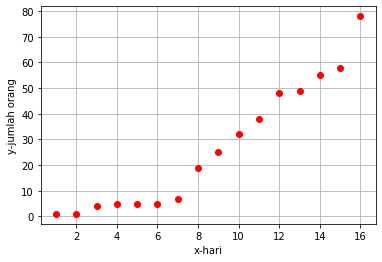

In [49]:
ax = plt.plot(x,y,'ro')
plt.grid()
plt.xlabel('x-hari')
plt.ylabel('y-jumlah orang')

#### Regresi Berpangkat

**Data**

In [50]:
y = np.array ((1, 1, 4, 5, 5, 5, 7, 19, 25, 32, 38, 48, 49, 55, 58, 78))
y = y.astype('float64')
y

array([ 1.,  1.,  4.,  5.,  5.,  5.,  7., 19., 25., 32., 38., 48., 49.,
       55., 58., 78.])

In [51]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16.])

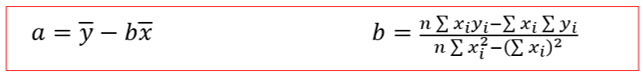

**Membuat xreg untuk plotting selanjutnya**

In [52]:
#membuat xreg
xreg = np.array(range(10,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

**Regresi berpangkat**

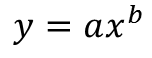

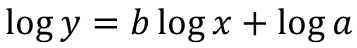

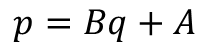

In [53]:
p = np.log10(y)
q = np.log10(x)

**Hitung regresi linear**

In [54]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil regresi linear**

In [55]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 1.7546q -0.3312


**Kembalikan ke bentuk pangkat**

In [56]:
a = 10**A #A=log(a)
b = B
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 0.4664x^(1.7546)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [57]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9604 dan r^2 = 0.9224


**Plot**

In [58]:
#membuat yreg
yreg = a*(xreg**b)
yreg
    

array([ 0.46644992,  0.55135579,  0.64229586,  0.73914243,  0.84178047,
        0.95010547,  1.06402186,  1.1834417 ,  1.30828365,  1.43847214,
        1.57393664,  1.71461113,  1.86043355,  2.01134545,  2.16729157,
        2.32821961,  2.49407986,  2.66482508,  2.84041021,  3.02079224,
        3.20593002,  3.39578414,  3.59031679,  3.78949165,  3.99327379,
        4.20162957,  4.41452656,  4.63193348,  4.85382008,  5.08015716,
        5.31091641,  5.54607044,  5.78559271,  6.02945744,  6.27763964,
        6.53011501,  6.78685993,  7.04785143,  7.31306716,  7.58248535,
        7.85608478,  8.13384476,  8.41574514,  8.70176622,  8.99188878,
        9.28609405,  9.58436368,  9.88667974, 10.19302469, 10.50338137,
       10.81773299, 11.13606309, 11.45835557, 11.78459465, 12.11476487,
       12.44885105, 12.78683832, 13.1287121 , 13.47445806, 13.82406216,
       14.17751059, 14.5347898 , 14.89588648, 15.26078754, 15.62948014,
       16.00195163, 16.37818958, 16.75818176, 17.14191617, 17.52

Text(0, 0.5, 'y-banyak orang')

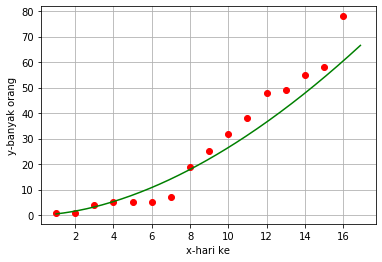

In [59]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'g')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

#### Regresi Eksponensial

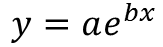

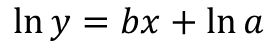

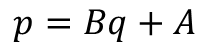

**Linearisasi**

In [60]:
y = np.array ((1, 1, 4, 5, 5, 5, 7, 19, 25, 32, 38, 48, 49, 55, 58, 78))
y = y.astype('float64')
y

array([ 1.,  1.,  4.,  5.,  5.,  5.,  7., 19., 25., 32., 38., 48., 49.,
       55., 58., 78.])

In [61]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16.])

In [62]:
p = np.log(y)
q = x

**Hitung regresi linear**

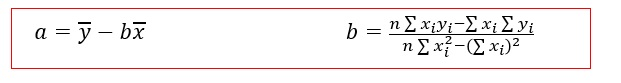

In [63]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil persamaan linear**

In [64]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 0.2916q + 0.1220


**Hitung kembali dalam bentuk bilangan berpangkat**

In [65]:
a = np.e**A
b = B

In [66]:
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 1.1297x^(0.2916)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [67]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9631 dan r^2 = 0.9276


**Plot data dan regresinya**

In [68]:
#membuat xreg
xreg = np.array(range(0,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [69]:
#membuat yreg
yreg = a*np.e**(b*xreg)
yreg

array([  1.12971244,   1.1631447 ,   1.19756633,   1.23300662,
         1.26949572,   1.30706466,   1.3457454 ,   1.38557084,
         1.42657486,   1.46879234,   1.51225918,   1.55701237,
         1.60308996,   1.65053115,   1.6993763 ,   1.74966695,
         1.80144589,   1.85475715,   1.90964608,   1.96615937,
         2.02434509,   2.08425274,   2.14593327,   2.20943914,
         2.27482439,   2.34214462,   2.41145709,   2.48282078,
         2.55629637,   2.63194636,   2.70983512,   2.79002888,
         2.87259586,   2.95760629,   3.04513249,   3.13524891,
         3.22803219,   3.32356127,   3.42191739,   3.52318422,
         3.62744791,   3.73479713,   3.8453232 ,   3.95912013,
         4.07628472,   4.19691664,   4.32111849,   4.44899591,
         4.58065769,   4.71621581,   4.85578559,   4.99948574,
         5.14743849,   5.29976969,   5.45660893,   5.6180896 ,
         5.78434906,   5.95552874,   6.13177424,   6.31323547,
         6.5000668 ,   6.69242714,   6.89048011,   7.09

Text(0, 0.5, 'y-banyak orang')

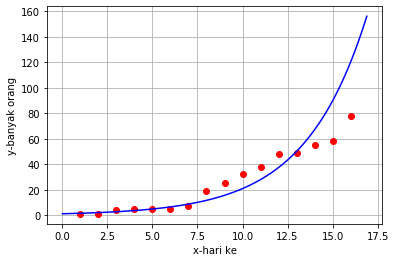

In [70]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

**Selesai**

#### Regresi Polinomial

In [71]:
y = np.array ((1, 1, 4, 5, 5, 5, 7, 19, 25, 32, 38, 48, 49, 55, 58, 78))
y = y.astype('float64')
y

array([ 1.,  1.,  4.,  5.,  5.,  5.,  7., 19., 25., 32., 38., 48., 49.,
       55., 58., 78.])

In [72]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16.])

**Membentuk regresi polinomial dari matriks**

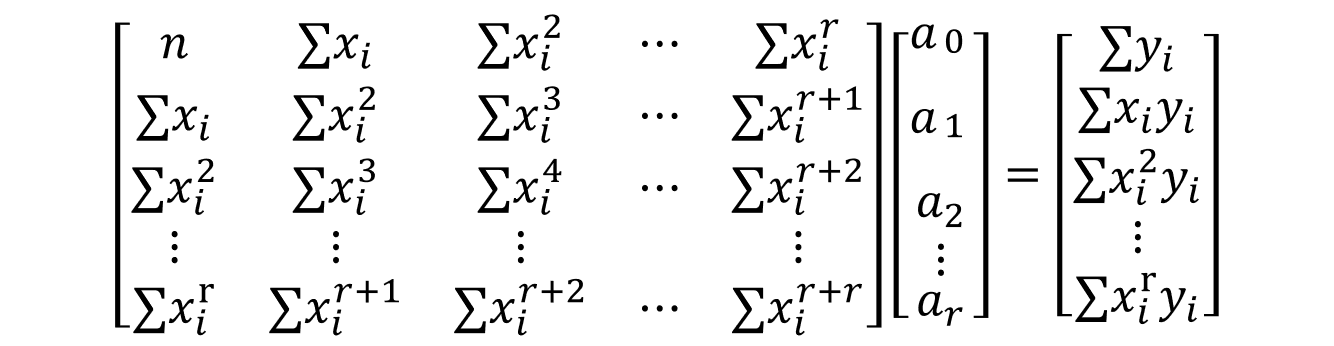

**Mendefinisikan elemen-elemen matriks kiri**

In [73]:
n = len(y)
a = x.sum()
b = (x**2).sum()
c = (x**3).sum()
d = (x**4).sum()
e = (x**5).sum()
f = (x**6).sum()
A = np.array(([n, a, b, c],
    [a, b, c, d],
    [b, c, d, e],
    [c, d, e, f]))
A

array([[1.6000000e+01, 1.3600000e+02, 1.4960000e+03, 1.8496000e+04],
       [1.3600000e+02, 1.4960000e+03, 1.8496000e+04, 2.4384800e+05],
       [1.4960000e+03, 1.8496000e+04, 2.4384800e+05, 3.3477760e+06],
       [1.8496000e+04, 2.4384800e+05, 3.3477760e+06, 4.7260136e+07]])

**Mendefinisikan elemen-elemen matriks kanan**

In [74]:
g = y.sum()
h = (x*y).sum()
i = ((x**2)*y).sum()
j = ((x**3)*y).sum()
B = np.array(([g],
    [h],
    [i],
    [j]))
B

array([[4.30000e+02],
       [5.35500e+03],
       [7.07990e+04],
       [9.71829e+05]])

**Invers matriks sisi kiri**

In [75]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 1.66208791e+00, -7.49542125e-01,  9.06593407e-02,
        -3.20512821e-03],
       [-7.49542125e-01,  4.05623000e-01, -5.32179808e-02,
         1.97026629e-03],
       [ 9.06593407e-02, -5.32179808e-02,  7.34443575e-03,
        -2.81151597e-04],
       [-3.20512821e-03,  1.97026629e-03, -2.81151597e-04,
         1.10255528e-05]])

**Mencari nilai a0, a1, a2, dst dengan a = (A^-1)B namun di sini variabel a diganti dengan Y**

In [76]:
Y = Ainv.dot(B)
print(Y)

[[ 4.65384615]
 [-3.20985486]
 [ 0.7486604 ]
 [-0.01772909]]


In [77]:
a0 = Y[0,0]
a1 = Y[1,0]
a2 = Y[2,0]
a3 = Y[3,0]

**Hasil persamaan regresi polinomial**

In [78]:
print('y = {:.4f}x^3 + {:.4f}X^2 + {:.4f}x + {:.4f}'.format(a3, a2, a1, a0))

y = -0.0177x^3 + 0.7487X^2 + -3.2099x + 4.6538


In [79]:
y

array([ 1.,  1.,  4.,  5.,  5.,  5.,  7., 19., 25., 32., 38., 48., 49.,
       55., 58., 78.])

**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [80]:
yDt = (y-y.mean())**2
yD = (y-a0-a1*x-a2*(x**2)-a3*(x**3))**2
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9898 dan r^2 = 0.9276


**Plot**

Text(0, 0.5, 'y')

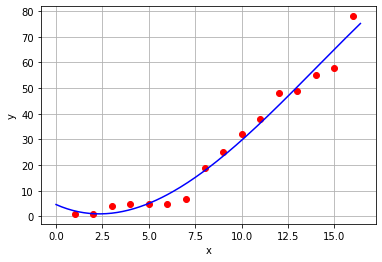

In [81]:
xreg = np.array(range(0,int((x[-1]+0.5)*10)))
xreg = xreg/10
yreg = a0 + a1*xreg + a2*(xreg**2) + a3*(xreg**3)
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Perbandingan jika memakai polyfit dengan derajat dinaikkan**

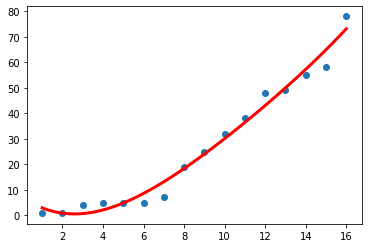

In [85]:
regpoly = np.poly1d(np.polyfit(x, y, 4))

myline = np.linspace(1, len(y), 100)

plt.scatter(x, y)
plt.plot(myline, regpoly(myline), linewidth=3, color='r')
plt.show()

In [83]:
print (regpoly)

          5          4         3         2
0.002428 x - 0.1016 x + 1.514 x - 9.274 x + 23.53 x - 16.22


In [84]:
print(r2_score(y, regpoly(x)))

0.9930034080338722


**Selesai**